# SMA ROC Portfolio

    1. The Security is above its 200-day moving average
    2. The Security closes with sma_roc > 0, buy.
    3. If the Security closes with sma_roc < 0, sell your long position.
    
    (For a Portfolio of securities.)

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
from talib.abstract import *

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format
pd.set_option('display.max_rows', None)

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

Yahoo finance cryptocurrencies:  
https://finance.yahoo.com/cryptocurrencies/

10 largest Crypto currencies from 5 years ago:  
https://coinmarketcap.com/historical/20160626/   

10 largest Crypto currencies from 4 years ago:  
https://coinmarketcap.com/historical/20170625/

10 largest Crypto currencies from 3 years ago:  
https://coinmarketcap.com/historical/20180624/

10 largest Crypto currencies from 2 years ago:  
https://coinmarketcap.com/historical/20190630/

Some global data

In [3]:
# Symbol Lists

BitCoin = ['BTC-USD']
CryptoCurrencies_2016 = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'LTC-USD',
                         'XEM-USD', 'DASH-USD', 'MAID-USD', 'LSK-USD', 'DOGE-USD']
# 'DAO-USD' is a dead coin, so missing from above


CryptoCurrencies_2017 = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'LTC-USD', 'ETC-USD',
                         'XEM-USD', 'MIOTA-USD', 'DASH-USD', 'BTS-USD']
# 'STRAT-USD' last trade date is 2020-11-18, so removed


CryptoCurrencies_2018 = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'BCH-USD', 'EOS-USD',
                         'LTC-USD', 'XLM-USD', 'ADA-USD', 'TRX-USD', 'MIOTA-USD']

CryptoCurrencies_2019 = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'LTC-USD', 'BCH-USD',
                         'EOS-USD', 'BNB-USD', 'USDT-USD', 'BSV-USD', 'CRO-USD']


Stocks_Bonds_Gold_Crypto = ['SPY', 'QQQ', 'TLT', 'GLD', 'BTC-USD']
# Set 'continuous_timeseries' : False (for mixed asset classes)


start_1900 = datetime.datetime(1900, 1, 1)
start_2016 = datetime.datetime(2016, 6, 26)
start_2017 = datetime.datetime(2017, 6, 25)
start_2018 = datetime.datetime(2018, 6, 24)
start_2019 = datetime.datetime(2019, 6, 30)


# Pick one of the above symbols and start pairs
symbols = CryptoCurrencies_2016
start = start_2016

capital = 10000
end = datetime.datetime.now()

In [4]:
# NOTE: Cryptocurrencies have 7 days a week timeseries.  You can test them with
# their entire timeseries by setting stock_market_calendar=False.  Alternatively,
# to trade with stock market calendar by setting stock_market_calendar=True.
# For mixed asset classes that include stocks or ETFs, you must set
# stock_market_calendar=True.

options = {
    'use_adj' : False,
    'use_cache' : True,
    'use_continuous_calendar' : False,
    'force_stock_market_calendar' : True,
    'stop_loss_pct' : 1.0,
    'margin' : 1,
    'lookback' : 1,
    'sma_timeperiod': 20,
    'sma_pct_band': 3,
    'use_regime_filter' : False,
    'use_vola_weight' : True
}

Run Strategy

In [5]:
s = strategy.Strategy(symbols, capital, start, end, options=options)
s.run()

View log DataFrames: raw trade log, trade log, and daily balance

In [6]:
s.rlog.head()

,date,seq_num,price,shares,entry_exit,direction,symbol
0,2017-01-18,0,886.62,1,entry,LONG,BTC-USD
1,2017-01-18,1,10.23,88,entry,LONG,ETH-USD
2,2017-01-18,2,14.06,45,entry,LONG,DASH-USD
3,2017-01-18,3,0.16,5608,entry,LONG,LSK-USD
4,2017-01-18,4,0.12,5615,entry,LONG,MAID-USD


In [7]:
s.tlog.head()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
0,2017-01-18,3.84,2017-01-25,3.71,-0.12,-23.87,193,-23.87,LONG,LTC-USD
1,2017-01-18,886.62,2017-02-02,1011.80,125.18,125.18,1,101.31,LONG,BTC-USD
2,2017-01-18,0.16,2017-02-02,0.16,-0.00,-21.79,5608,79.53,LONG,LSK-USD
3,2017-01-18,0.12,2017-03-08,0.14,0.02,115.85,5615,195.38,LONG,MAID-USD
4,2017-01-18,14.06,2017-04-10,60.53,46.47,2091.05,45,2286.43,LONG,DASH-USD


In [8]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2021-06-22,7126424.87,7126424.87,7126424.87,1067457,6429836.61,1.00,-
2021-06-23,7144885.46,7144885.46,7144885.46,1067457,6429836.61,1.00,-
2021-06-24,7077520.42,7077520.42,7077520.42,1067457,6429836.61,1.00,-
2021-06-25,7086677.07,7086677.07,7086677.07,1067457,6429836.61,1.00,-
2021-06-28,7136659.71,7136659.71,7136659.71,0,7136659.71,1.00,X


Generate strategy stats - display all available stats

In [9]:
pf.print_full(s.stats)

start                                                  2017-01-18
end                                                    2021-06-28
beginning_balance                                           10000
ending_balance                                         7136659.71
total_net_profit                                       7126659.71
gross_profit                                           9450289.90
gross_loss                                            -2323630.19
profit_factor                                                4.07
return_on_initial_capital                                71266.60
annual_return_rate                                         339.09
trading_period                           4 years 5 months 10 days
pct_time_in_market                                          86.92
margin                                                          1
avg_leverage                                                 1.00
max_leverage                                                 1.00
min_levera

View Performance by Symbol

,cumul_total,weight,pct_cumul_total,relative_performance
BTC-USD,"$443,393.17",0.11,0.06,0.56
XEM-USD,"-$248,652.70",0.11,-0.03,-0.31
XRP-USD,"$937,751.60",0.11,0.13,1.18
DOGE-USD,"$5,511,979.24",0.11,0.77,6.96
ETH-USD,"$347,584.26",0.11,0.05,0.44
DASH-USD,"$168,946.79",0.11,0.02,0.21
LSK-USD,"-$398,903.94",0.11,-0.06,-0.50
MAID-USD,"$178,959.50",0.11,0.03,0.23
LTC-USD,"$185,601.78",0.11,0.03,0.23
TOTAL,"$7,126,659.71",1.00,1.00,1.00


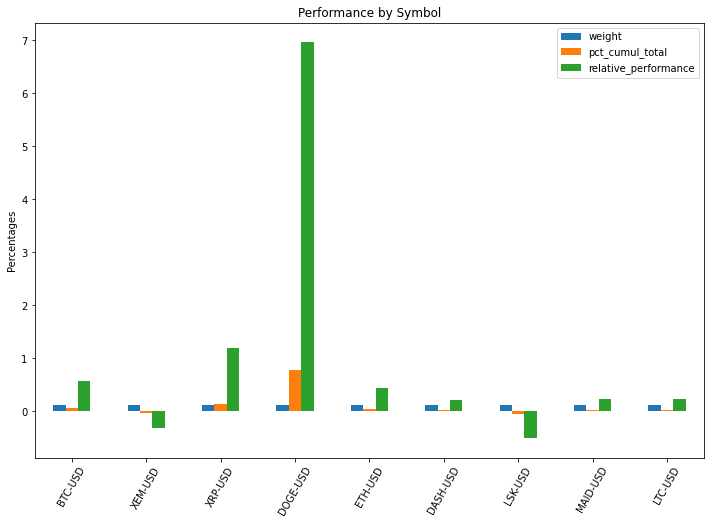

In [10]:
weights = {symbol: 1 / len(symbols) for symbol in symbols}
totals = s.portfolio.performance_per_symbol(weights=weights)
totals

,BTC-USD,XEM-USD,XRP-USD,DOGE-USD,ETH-USD,DASH-USD,LSK-USD,MAID-USD,LTC-USD
BTC-USD,1.00,0.48,0.44,0.49,0.68,0.62,0.55,0.58,0.67
XEM-USD,0.48,1.00,0.50,0.41,0.52,0.50,0.57,0.44,0.52
XRP-USD,0.44,0.50,1.00,0.39,0.47,0.45,0.40,0.42,0.50
DOGE-USD,0.49,0.41,0.39,1.00,0.49,0.44,0.45,0.40,0.50
ETH-USD,0.68,0.52,0.47,0.49,1.00,0.69,0.62,0.56,0.69
DASH-USD,0.62,0.50,0.45,0.44,0.69,1.00,0.61,0.51,0.62
LSK-USD,0.55,0.57,0.40,0.45,0.62,0.61,1.00,0.53,0.56
MAID-USD,0.58,0.44,0.42,0.40,0.56,0.51,0.53,1.00,0.50
LTC-USD,0.67,0.52,0.50,0.50,0.69,0.62,0.56,0.50,1.00


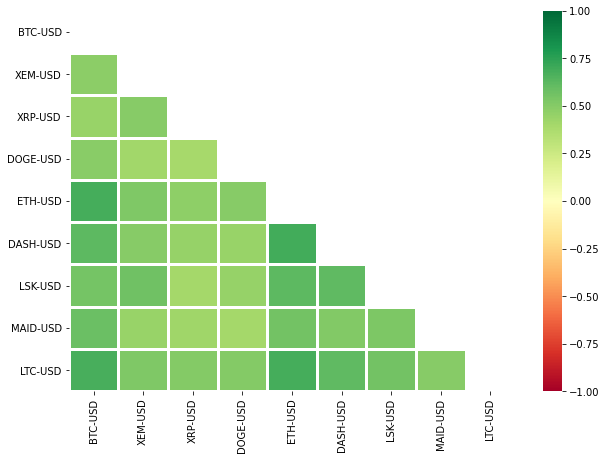

In [11]:
corr_df = s.portfolio.correlation_map(s.ts)
corr_df

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [12]:
benchmark = pf.Benchmark('BTC-USD', s.capital, s.start, s.end, use_adj=True)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

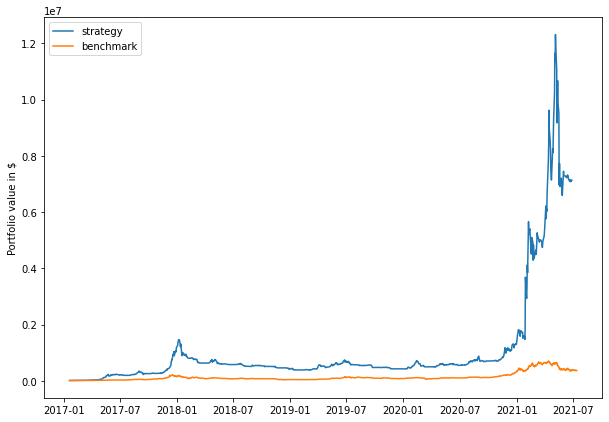

In [13]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,339.09,122.66
max_closed_out_drawdown,-74.31,-83.30
annualized_return_over_max_drawdown,4.56,1.47
best_month,437.34,131.81
worst_month,-45.22,-48.57
sharpe_ratio,2.00,1.16
sortino_ratio,3.24,1.58
monthly_std,56.95,22.70
annual_std,1502.52,250.78


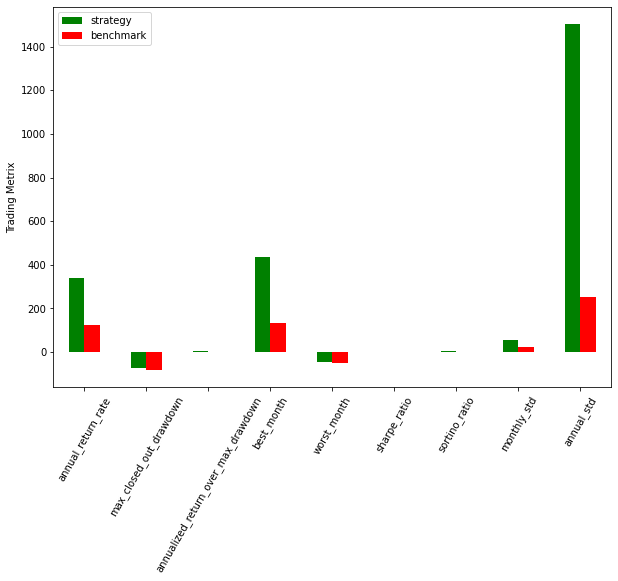

In [14]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Analysis: Kelly Criterian

In [15]:
kelly = pf.kelly_criterian(s.stats, benchmark.stats)
kelly

sharpe_ratio             2.00
sharpe_ratio_max         2.15
sharpe_ratio_min         1.84
strategy risk           15.03
instrument risk          2.51
optimal target risk      2.00
half kelly criterian     1.00
aggressive leverage      0.80
moderate leverage        0.40
conservative leverage    0.37
dtype: float64